###  IMPORT LIBARIES AND DATASETS

In [697]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [698]:
df.shape


(70000, 13)

###EXPLORATORY DATA ANALYSIS

In [699]:
df=df.drop(columns=["id","active","gluc"])


In [700]:
df["age"]=df["age"]/365

In [701]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,cardio
0,50.391781,2,168,62.0,110,80,1,0,0,0
1,55.419178,1,156,85.0,140,90,3,0,0,1
2,51.663014,1,165,64.0,130,70,3,0,0,1
3,48.282192,2,169,82.0,150,100,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,0,0,0


In [702]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,0.053771,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,0.225568,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,0.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,0.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,0.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,1.000000,1.000000


In [703]:
# Imprime el número de filas antes de la limpieza
print(f"Número de filas ANTES de la limpieza: {df.shape[0]}")

# Filtramos los datos para mantener solo las filas con valores de presión arterial lógicos
# Presión sistólica (ap_hi) entre 80 y 200
# Presión diastólica (ap_lo) entre 50 y 120
df_limpio = df[
    (df['ap_hi'] <= 200) &
    (df['ap_hi'] >= 80) &
    (df['ap_lo'] <= 120) &
    (df['ap_lo'] >= 50)
]

# Imprime el número de filas después de la limpieza
print(f"Número de filas DESPUÉS de la limpieza: {df_limpio.shape[0]}")

# Reasignamos nuestro dataframe limpio para usarlo en los siguientes pasos
df = df_limpio

Número de filas ANTES de la limpieza: 70000
Número de filas DESPUÉS de la limpieza: 68602


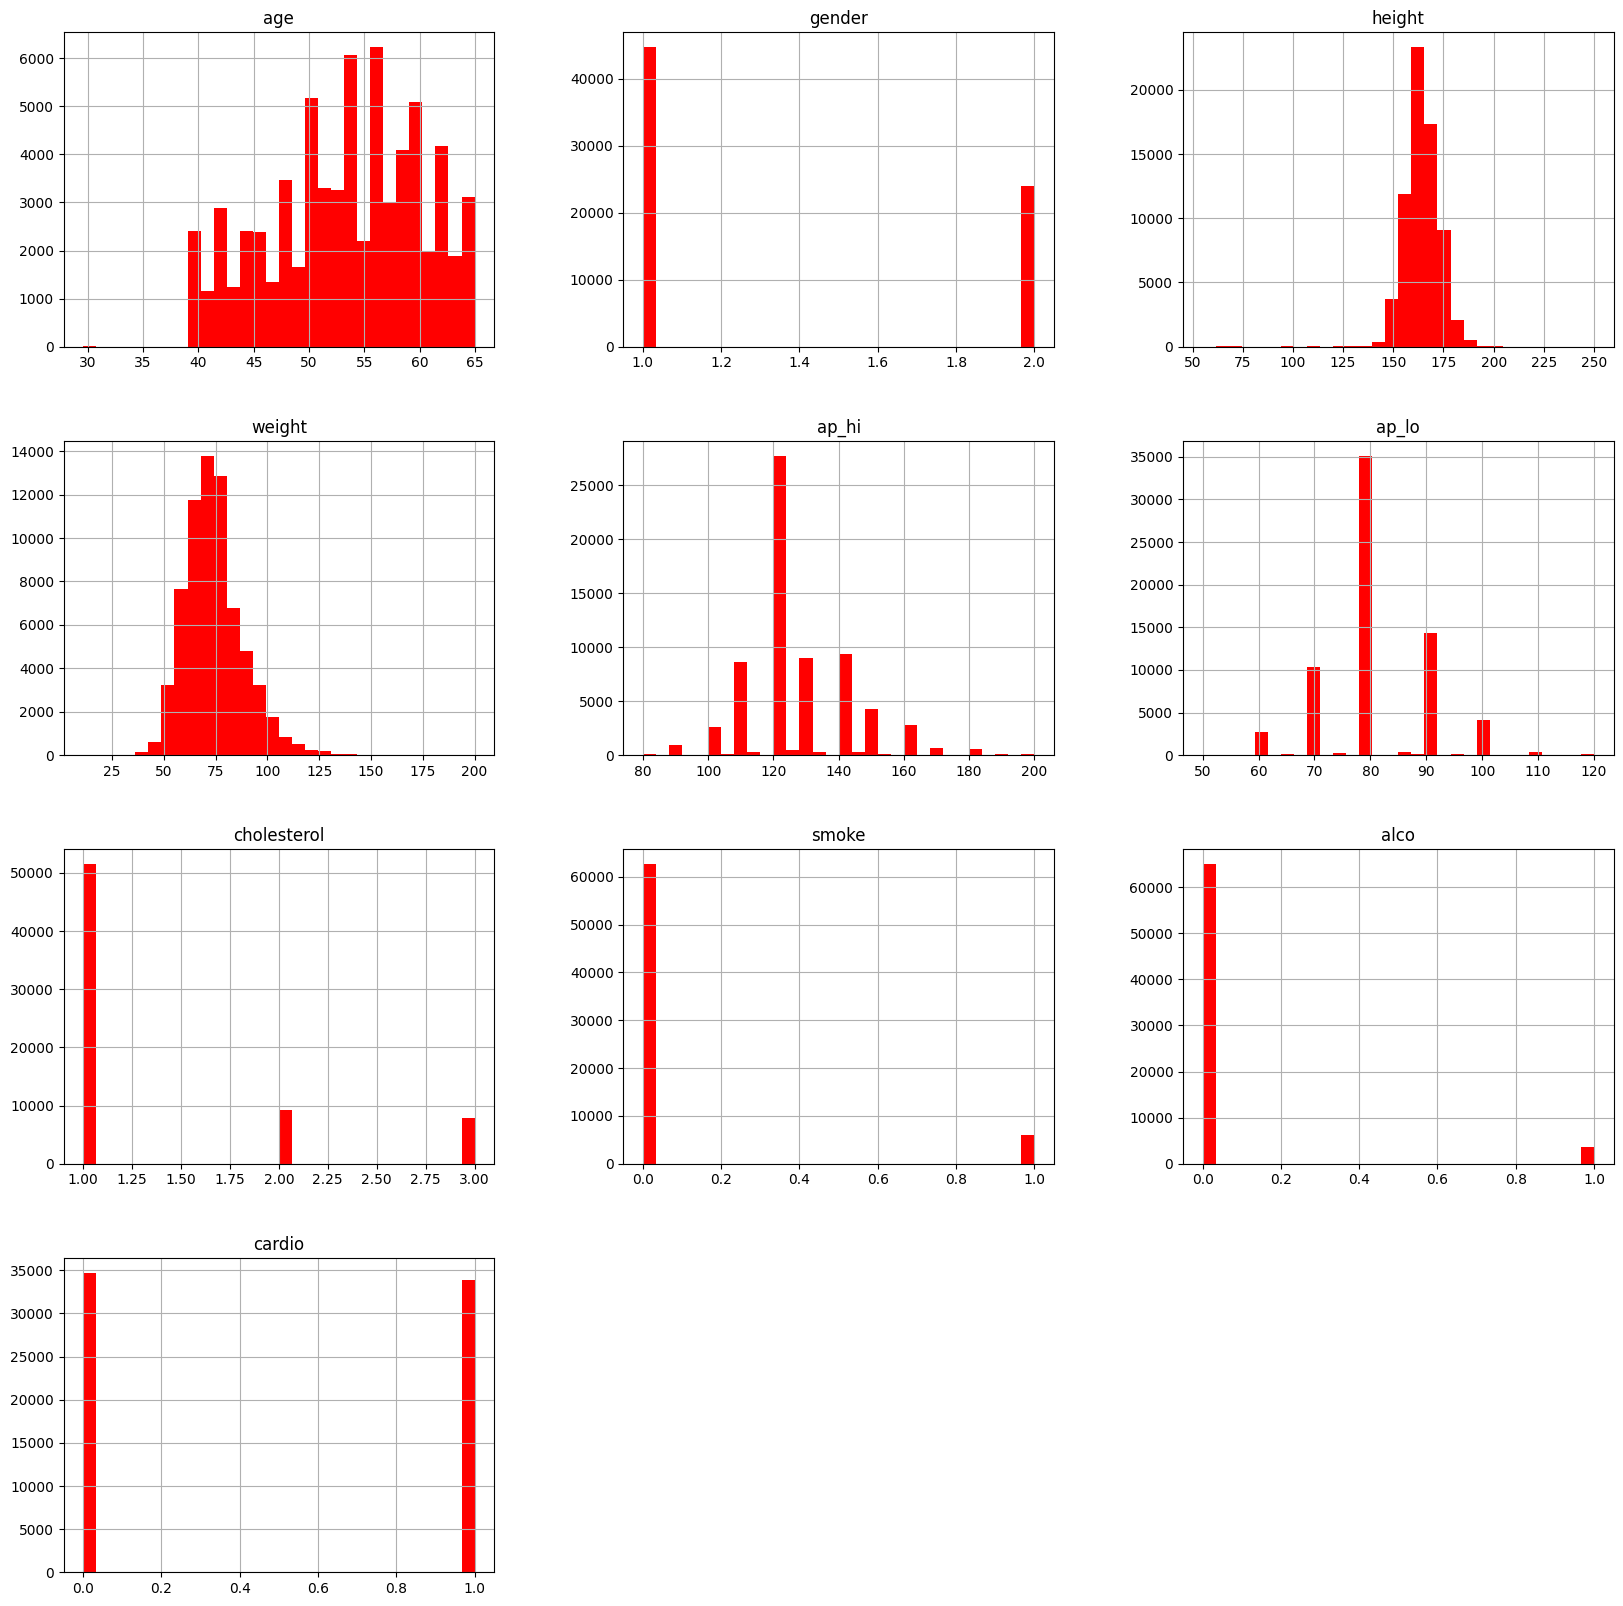

In [704]:
df.hist(bins = 30, figsize = (20,20), color = 'r')
plt.show()

In [705]:
# get the correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,cardio
age,1.000000,-0.023192,-0.081465,0.054261,0.210546,0.156426,0.155152,-0.047509,-0.028543,0.239439
gender,-0.023192,1.000000,0.498960,0.155932,0.060938,0.066662,-0.036999,0.338724,0.171359,0.006830
height,-0.081465,0.498960,1.000000,0.291940,0.017324,0.035168,-0.050902,0.188146,0.094919,-0.010914
weight,0.054261,0.155932,0.291940,1.000000,0.269277,0.252232,0.140299,0.066798,0.067579,0.179126
ap_hi,0.210546,0.060938,0.017324,0.269277,1.000000,0.723166,0.194979,0.026756,0.034630,0.429776
ap_lo,0.156426,0.066662,0.035168,0.252232,0.723166,1.000000,0.160976,0.024431,0.037938,0.341250
cholesterol,0.155152,-0.036999,-0.050902,0.140299,0.194979,0.160976,1.000000,0.009650,0.035048,0.221177
smoke,-0.047509,0.338724,0.188146,0.066798,0.026756,0.024431,0.009650,1.000000,0.340109,-0.016528
alco,-0.028543,0.171359,0.094919,0.067579,0.034630,0.037938,0.035048,0.340109,1.000000,-0.008766
cardio,0.239439,0.006830,-0.010914,0.179126,0.429776,0.341250,0.221177,-0.016528,-0.008766,1.000000


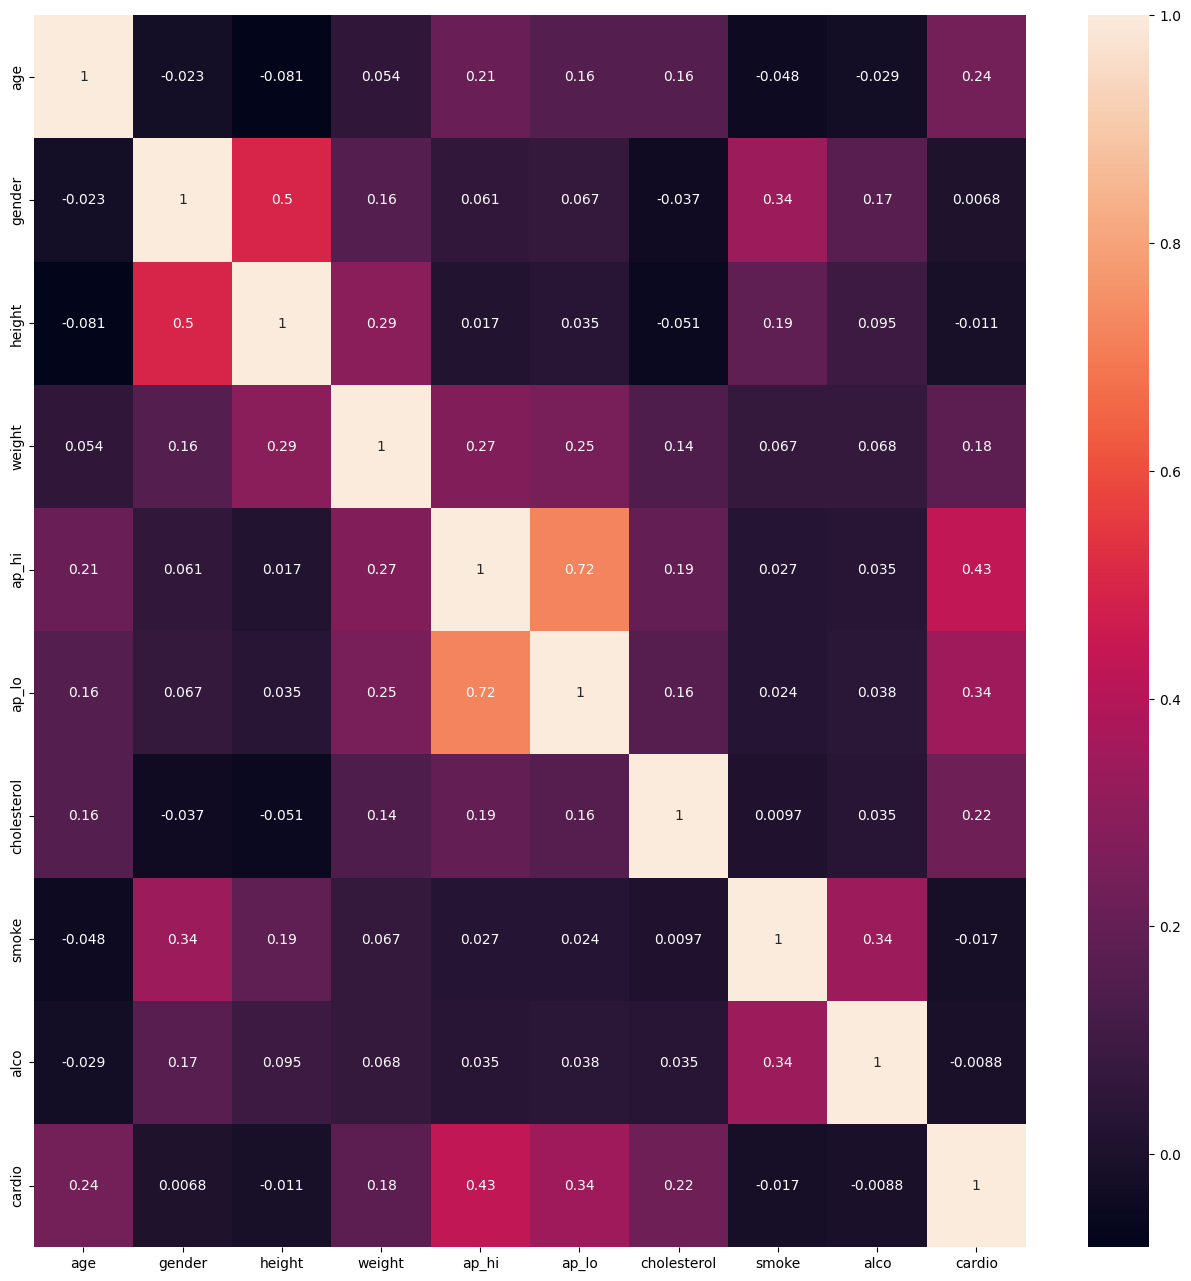

In [706]:
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

###CREATE TRAINING AND TESTING DATASET

In [707]:
# split the dataframe into target and features
y = df['cardio']
X = df.drop(columns =['cardio'])

In [708]:
X.shape

(68602, 9)

In [709]:
y.shape

(68602,)

In [710]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [711]:
X_train.shape

(54881, 9)

In [712]:
y_train.shape

(54881,)

In [713]:
X_test.shape

(13721, 9)

In [714]:
y_test.shape

(13721,)

###UNDERSTAND XG-BOOST ALGORITHM TO SOLVE CLASSIFICATION TYPE PROBLEMS

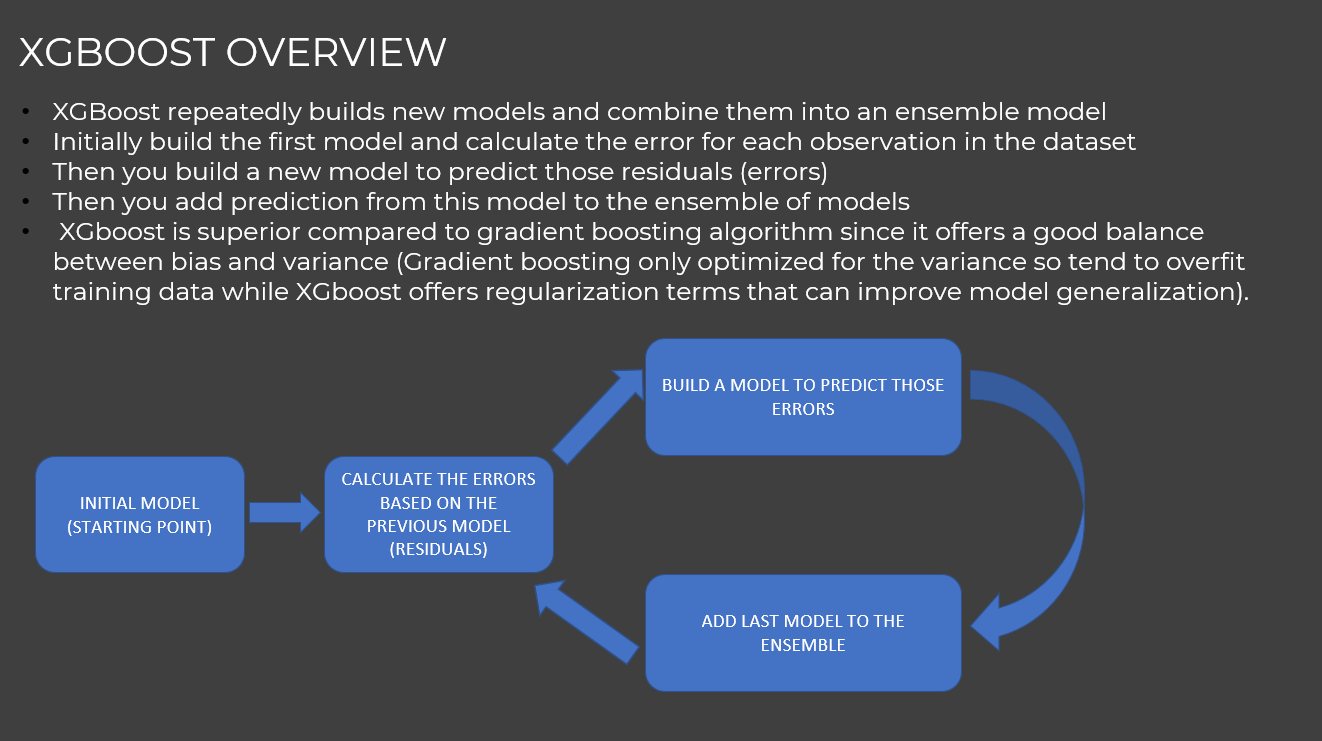

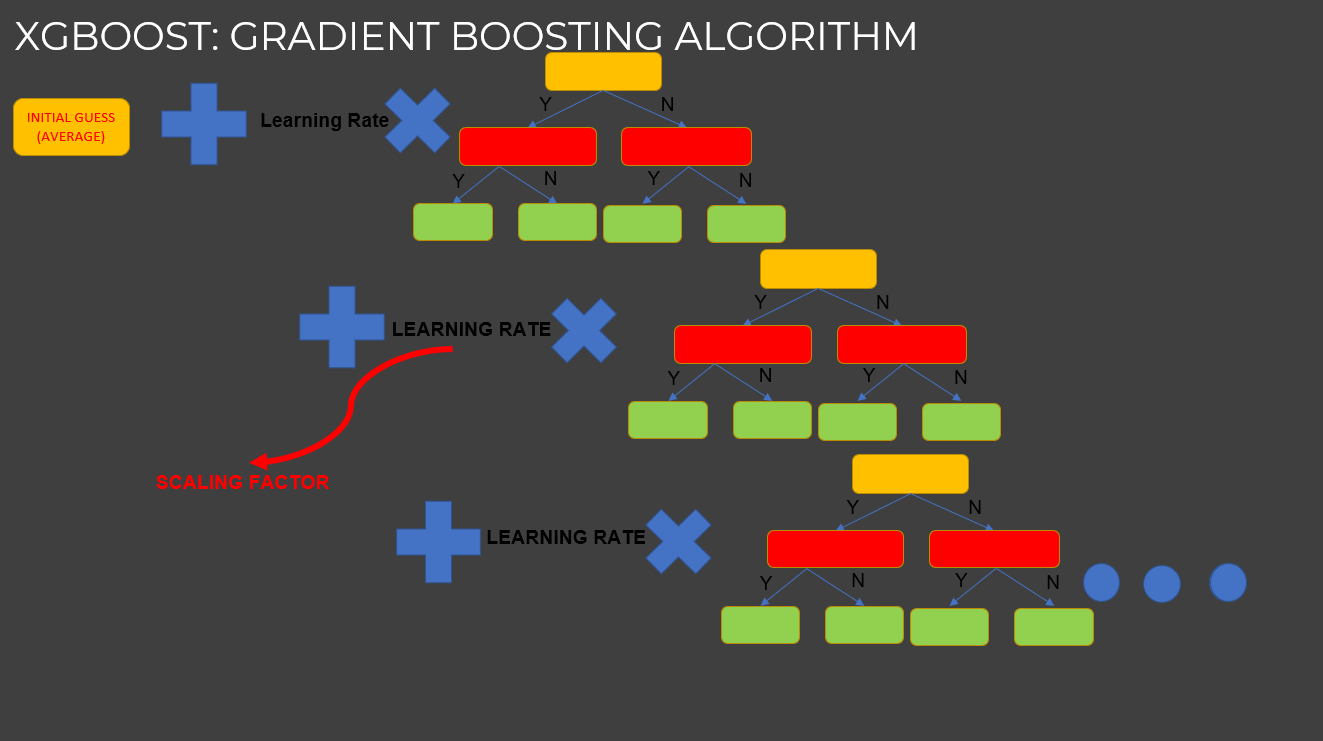

###TRAIN AN XG-BOOST CLASSIFIER IN SK-LEARN

In [715]:
from xgboost import XGBClassifier

In [716]:
# Train an XGBoost classifier model

xgb_classifier = XGBClassifier(objective ='binary:logistic', eval_metric = 'error', learning_rate = 0.1, max_depth = 3, n_estimators = 300)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###TEST XGBOOST CLASSIFIER TO PERFORM INFERENCE

In [717]:
# predict the score of the trained model using the testing dataset
result = xgb_classifier.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7307776401136943


In [718]:
# make predictions on the test data
y_predict = xgb_classifier.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [719]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6887
           1       0.75      0.69      0.72      6834

    accuracy                           0.73     13721
   macro avg       0.73      0.73      0.73     13721
weighted avg       0.73      0.73      0.73     13721



<Axes: >

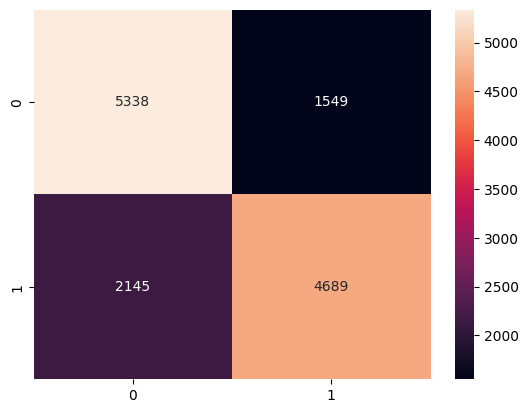

In [720]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt = 'd', annot = True)

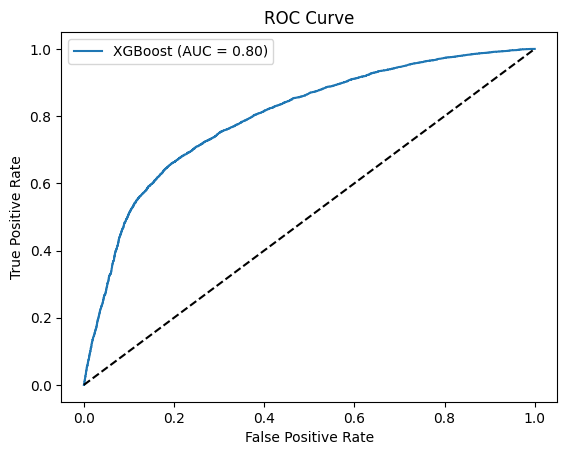

In [721]:
from sklearn.metrics import roc_curve, auc

y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
